<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# fxcm.py  - a python wrapper for the FXCM API

#### By
#### Michael Schwed
#### The Python Quants GmbH
#### August 2017

The import 

In [1]:
import fxcm
import importlib
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook


In [17]:
importlib.reload(fxcm)

<module 'fxcm' from '/notebooks/pyalgo/schwed/FXCM/fxcm.py'>

## Creating an instance of fxcm.

This is, as usually, done by the class constructor. 

**fxcm(user='', password='', config_file='', log_file='', log_level='')**, where

* **user**: is the user name as provided by **FXCM**
* **password**: is the user's password
* **config_file**: the path to an optional configuration file containing values for the other parameter.
* **log_file**: the path to a log file. If not given, log messages are print to stdout.
* **log_level**: Determines the granularity of the log messages. Possible values are : *error*, *warn*, *info* and *debug*. Default is *warn*

If one or more of the arguments *user*, *password*, *log_file* or *log_level* are not given, fxcmpy checks the value of config_file, if it points to an existing configuration file, fxcmpy tries to read the missing arguments from that file. 

In [18]:
con = fxcm.fxcm(user='d101537826', password='1234', log_level='info')

|INFO|2017-08-31 17:40:53,138|Connecting FXCM Server for user d101537826|
|INFO|2017-08-31 17:40:53,140|Requesting access token...|
|INFO|2017-08-31 17:40:53,736|Received temporary token 7f17b96c02b6d91328c3b6770cc91f66ef266da1|
|INFO|2017-08-31 17:40:54,347|Received access token|
|INFO|2017-08-31 17:40:55,078|Connection established|
|INFO|2017-08-31 17:40:55,839|Try to subscribe for Order|


In [5]:
con.is_connected()

True

## What happend in the background?

The instance of fxcm collects the account ids and all available order of the user.  

In [6]:
con.get_account_ids()

{2555956}

In [7]:
order_ids = con.get_order_ids()
print(order_ids)

[331982721, 331973312, 331725774, 331973314, 331982086, 331982534, 331969433, 331969435, 331725776, 331982367, 331973522, 331973524, 331973546, 331691115, 331969382, 331971825, 331971827, 331973493, 331973495]


In [8]:
con.get_order(order_ids[0])

{'accountId': '2555956',
 'accountName': '02555956',
 'amountK': 111,
 'buy': 110,
 'currency': 'USD/JPY',
 'currencyPoint': 10.05658,
 'isBuy': True,
 'isELSOrder': False,
 'isEntryOrder': True,
 'isLimitOrder': True,
 'isNetQuantity': False,
 'isStopOrder': False,
 'limit': 112,
 'limitPegBaseType': -1,
 'limitRate': 112,
 'ocoBulkId': 0,
 'orderId': '331982721',
 'range': 0,
 'ratePrecision': 3,
 'sell': 0,
 'status': 1,
 'stop': -120,
 'stopMove': 0,
 'stopPegBaseType': 1,
 'stopRate': 108.779,
 't': 3,
 'time': '08302017130127',
 'timeInForce': 'GTC',
 'type': 'LE'}

fxcm also establishes a stream for the trading table 'Order' and watches for all Insert, Update and Delete events.

## Available instruments

To get the available instruments, use the method 

**get_instruments()**

Returns a list of the symbols of the available instruments.

In [9]:
instruments = con.get_instruments()
print(instruments)

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD', 'EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'CHF/JPY', 'GBP/CHF', 'EUR/AUD', 'EUR/CAD', 'AUD/CAD', 'AUD/JPY', 'CAD/JPY', 'NZD/JPY', 'GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'USD/CNH', 'AUS200', 'ESP35', 'FRA40', 'GER30', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'UK100', 'US30', 'Copper', 'EUSTX50', 'USDOLLAR', 'USOil', 'UKOil', 'NGAS', 'Bund', 'XAU/USD', 'XAG/USD']


## Subscribing for market data

You can subscribe for market data with the method 

**subscribe_market_data(symbol, add_callbacks=list())**, where

* **symbol**: is the symbol of an available instrument as given by *get_instruments()*
* **add_callbacks**: a list of methods. Default is an empty list. A typical callback function has to     
  look as follows:
  
  **callback_function(data, dataframe)**, where
  * **data**: is a *json* object.
  * **dataframe**: is a *Pandas DataFrame* object.


The method creates a stream of the symbols data. That data will be stored in a *Pandas DataFrame* object. After that, the methods found in *add_callbacks* are called with the data send by the server and the *Pandas DataFrame*, the data is stored in.


In [10]:
con.subscribe_market_data('EUR/USD')

|INFO|2017-08-31 16:12:43,643|Try to subscribe for EUR/USD|


The object will remember subscribed symbols and their values. 

In [11]:
symbols = con.get_subscribed_symbols()

In [12]:
print(symbols)

['EUR/USD']


In [13]:
con.is_subscribed('EUR/USD')

True

Prices for a symbol are collected in a *Pandas DataFrame*

In [14]:
con.get_prices('EUR/USD')

,Bid,High,Low,Close
2017-08-31 14:12:44,1.18551,1.18573,1.19069,1.18219
2017-08-31 14:12:45,1.18551,1.18573,1.19069,1.18219
2017-08-31 14:12:46,1.18552,1.18575,1.19069,1.18219
2017-08-31 14:12:49,1.18553,1.18575,1.19069,1.18219


Unsubscribe works in the same way:

In [15]:
con.unsubscribe_market_data('EUR/USD')

|INFO|2017-08-31 16:12:52,218|Try to unsubscribe for EUR/USD|


In [16]:
con.is_subscribed('EUR/USD')

False

In [17]:
con.get_prices('EUR/USD')

,Bid,High,Low,Close


### Additional callbacks

As an example, we define a method called test, that method prints new incoming data and also the length of the *Pandas DataFrame* storing the data.

In [18]:
def test(data, dataframe):
    print('New values received for %s: %s, %s, %s, %s, %s' 
          % (data['Symbol'], pd.to_datetime(int(data['Updated']), unit='s'), 
            data['Rates'][0], data['Rates'][1], data['Rates'][2], data['Rates'][3]))
    print('Length of the Pandas Dataframe: %s' % len(dataframe))

Now, we subscribe to the 'EUR/USD' again. To stop the notebook from generating output, just execute the very next cell.

In [19]:
con.subscribe_market_data('EUR/USD', (test,))

|INFO|2017-08-31 16:12:57,661|Try to subscribe for EUR/USD|
|INFO|2017-08-31 16:12:57,661|Adding callback method test for symbol EUR/USD|


New values received for EUR/USD: 2017-08-31 14:12:58, 1.18557, 1.18581, 1.19069, 1.18219
Length of the Pandas Dataframe: 1
New values received for EUR/USD: 2017-08-31 14:12:59, 1.18557, 1.1858, 1.19069, 1.18219
Length of the Pandas Dataframe: 2
New values received for EUR/USD: 2017-08-31 14:13:00, 1.18556, 1.18578, 1.19069, 1.18219
Length of the Pandas Dataframe: 3


In [20]:
con.unsubscribe_market_data('EUR/USD')

|INFO|2017-08-31 16:13:00,873|Try to unsubscribe for EUR/USD|


New values received for EUR/USD: 2017-08-31 14:13:00, 1.18556, 1.18578, 1.19069, 1.18219
Length of the Pandas Dataframe: 4


### Callbacks with global variables

To use other variables than the *json* and the *DataFrame* objects in your callbacks, use *globals*.
As an example, we create an empty plot and define a callback which updates that plot everytime new data is received. 

<IPython.core.display.Javascript object>


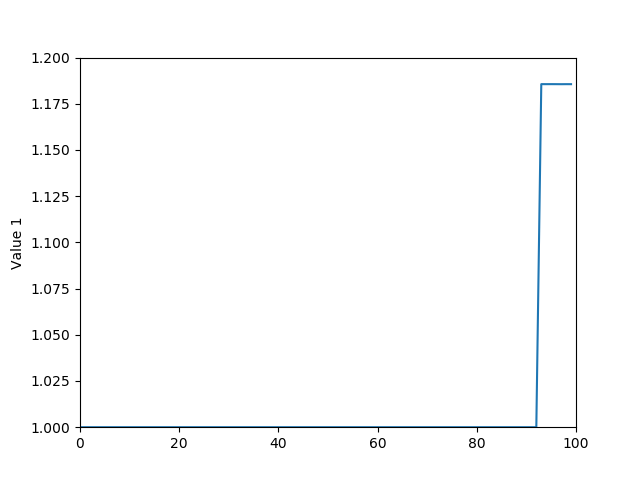

In [21]:
x = np.arange(100)
y = 100*[1,]
fig,ax = plt.subplots(1,1)
ax.set_ylabel('Value 1')
ax.set_xlim(0,100)
ax.set_ylim(1,1.2)
ax.plot(x,y)

Here is the definition of the new callback method. Please note that we declared the variables *y*, *fig* and *ax* as *global*, which means that they refer to the according variables defined in the cell above.

In [22]:
def update_plot(data, df):
    global y
    global fig
    global ax
    new_y = data['Rates'][0]
    y = y[1:]
    y.append(new_y)
    ax.lines[0].set_ydata(y)
    fig.canvas.draw()


Let's start the stream. After that you can observe how the plot above updates.

In [23]:
con.subscribe_market_data('EUR/USD', (update_plot, ))

|INFO|2017-08-31 16:13:13,233|Try to subscribe for EUR/USD|
|INFO|2017-08-31 16:13:13,234|Adding callback method update_plot for symbol EUR/USD|


In [24]:
con.unsubscribe_market_data('EUR/USD')

|INFO|2017-08-31 16:13:17,605|Try to unsubscribe for EUR/USD|


### Models

Data about your account and the market are stored in so called *trading tables*. To fetch that data,
use 

**get_model(models=list())**, where

* **models**: is a list containing the desired models. Thereby the single values have to be one of
  *Account*, *ClosedPosition*, *Offer*, *OpenPosition*, *Order* or *Summary*.

In [25]:
con.get_model(models=('Account','Order'))

{'accounts': [{'accountId': '2555956',
   'accountName': '02555956',
   'balance': 447484.87,
   'dayPL': -1572.30413,
   'equity': 447167.68587,
   'grossPL': -317.18413,
   'hedging': 'N',
   'mc': 'N',
   'ratePrecision': 0,
   't': 6,
   'usableMargin': 347167.68587,
   'usableMargin3': 247167.68587,
   'usableMargin3Perc': 55.27405,
   'usableMarginPerc': 77.63702,
   'usdMr': 100000,
   'usdMr3': 200000},
  {'accountId': '',
   'accountName': '',
   'balance': 447484.87,
   'dayPL': -1255.12,
   'equity': 447484.87,
   'grossPL': 0,
   'hedging': '',
   'isTotal': True,
   'mc': '',
   'ratePrecision': 0,
   't': 6,
   'usableMargin': 347484.87,
   'usableMargin3': 0,
   'usableMargin3Perc': 0,
   'usableMarginPerc': 77.65288,
   'usdMr': 100000,
   'usdMr3': 0}],
 'orders': [{'accountId': '2555956',
   'accountName': '02555956',
   'amountK': 111,
   'buy': 110,
   'currency': 'USD/JPY',
   'currencyPoint': 10.05827,
   'isBuy': True,
   'isELSOrder': False,
   'isEntryOrder': T

There are shortcuts for the models *ClosedPosition*, *Offer*, *OpenPosition* and *Order*, namely

**get_open_positions(kind='dataframe')**

**get_closed_positions(kind='dataframe')**

**get_offers(kind='dataframe')**

**get_orders(kind='dataframe')**,

**get_accounts(kind='dataframe')**,

**get_summary(kind='dataframe')**,

where

* **kind**: is either *dataframe* (default) or *list* and determines the shape of the return. 

In [26]:
con.get_orders()

,accountId,accountName,amountK,buy,currency,currencyPoint,isBuy,isELSOrder,isEntryOrder,isLimitOrder,...,sell,status,stop,stopMove,stopPegBaseType,stopRate,t,time,timeInForce,type
0,2555956,02555956,111,110.0000,USD/JPY,10.05849,True,False,True,True,...,0.000,1,-120,0,1,108.777,3,08302017130127,GTC,LE
1,2555956,02555956,25,1.1101,EUR/USD,2.50000,True,False,True,True,...,0.000,1,0,0,-1,0.000,3,08302017102619,GTC,LE
2,2555956,02555956,25,1.1101,EUR/USD,2.50000,True,False,True,True,...,0.000,1,0,0,-1,0.000,3,08292017013218,GTC,LE
3,2555956,02555956,25,0.0000,EUR/USD,2.50000,False,False,True,False,...,1.113,1,0,0,-1,0.000,3,08302017102619,GTC,SE
4,2555956,02555956,112,110.0000,USD/JPY,10.14911,True,False,True,True,...,0.000,1,0,0,-1,0.000,3,08302017125543,GTC,LE
5,2555956,02555956,111,110.0000,USD/JPY,10.05849,True,False,True,True,...,0.000,1,0,0,-1,0.000,3,08302017125948,GTC,LE
6,2555956,02555956,25,1.1101,EUR/USD,2.50000,True,False,True,True,...,0.000,1,0,0,-1,0.000,3,08302017082931,GTC,LE
7,2555956,02555956,25,0.0000,EUR/USD,2.50000,False,False,True,False,...,1.113,1,0,0,-1,0.000,3,08302017082931,GTC,SE
8,2555956,02555956,25,0.0000,EUR/USD,2.50000,False,False,True,False,...,1.113,1,0,0,-1,0.000,3,08252017155647,GTC,SE
9,2555956,02555956,111,110.0000,USD/JPY,10.05849,True,False,True,True,...,0.000,1,0,0,-1,0.000,3,08302017125826,GTC,LE


In [27]:
con.get_offers(kind='list')

[{'buy': 1.18591,
  'buyTradable': True,
  'currency': 'EUR/USD',
  'defaultSortOrder': 100,
  'emr': 0,
  'fractionDigits': 5,
  'high': 1.19069,
  'instrumentType': 1,
  'lmr': 0,
  'low': 1.18219,
  'mmr': 0.013,
  'offerId': 1,
  'pip': 0.0001,
  'pipCost': 0.0001,
  'pipFraction': 0.1,
  'ratePrecision': 5,
  'rollB': -0.736,
  'rollS': 0.351,
  'sell': 1.18567,
  'sellTradable': True,
  'spread': 2.4,
  't': 0,
  'time': '2017-08-31T14:13:25.000Z',
  'valueDate': '09042017',
  'volume': 1},
 {'buy': 110.369,
  'buyTradable': True,
  'currency': 'USD/JPY',
  'defaultSortOrder': 200,
  'emr': 0,
  'fractionDigits': 3,
  'high': 110.684,
  'instrumentType': 1,
  'lmr': 0,
  'low': 110.156,
  'mmr': 0.01,
  'offerId': 2,
  'pip': 0.01,
  'pipCost': 9e-05,
  'pipFraction': 0.1,
  'ratePrecision': 3,
  'rollB': 0.232,
  'rollS': -0.507,
  'sell': 110.348,
  'sellTradable': True,
  'spread': 2.1,
  't': 0,
  'time': '2017-08-31T14:13:25.000Z',
  'valueDate': '09042017',
  'volume': 1},


In [28]:
con.get_summary()

,amountK,amountKBuy,amountKSell,avgBuy,avgSell,closeBuy,closeSell,currency,currencyPoint,grossPL,...,netStop,netStopMove,offerId,plBuy,plSell,ratePrecision,rollSum,t,usedMarginBuy,usedMarginSell
0,5000,5000,0,110.353,0,0,110.348,USD/JPY,453.06886,-226.55599,...,0,0,2,-226.55599,0,3,278.4,5,100000,0
1,5000,5000,0,0.000,0,0,0.000,,0.00000,-226.55599,...,0,0,0,-226.55599,0,0,278.4,5,100000,0


In [29]:
con.get_accounts()

,accountId,accountName,balance,dayPL,equity,grossPL,hedging,isTotal,mc,ratePrecision,t,usableMargin,usableMargin3,usableMargin3Perc,usableMarginPerc,usdMr,usdMr3
0,2555956,02555956,447484.87,-1481.67599,447258.31401,-226.55599,N,NaN,N,0,6,347258.31401,247258.31401,55.28311,77.64156,100000,200000
1,,,447484.87,-1255.12000,447484.87000,0.00000,,True,,0,6,347484.87000,0.00000,0.00000,77.65288,100000,0


## Historical data

To fetch market data for a given instrument use the method 

**get_candles(offer_id, period, number, start=None, stop=None)**

where

* **offer_id**: Is a reference to an member of the *Offer* model, which defines the instrument to fetch data for.
* **period_id**: Must be one of *m1*, *m5*, *m15*, *m30*, *H1*, *H2*, *H3*, *H4*, *H6*, *H8*, *D1*, *W1* or *M1* and determines the period of the candles.
* **number**: The number of candles to retrieve, maximum is 10000.
* **start**: A *datetime* object. The first date, candles are retrieved for. If not given, that date is derived from the *stop* date, the period and the number of candles.
* **stop**: A *datetime* object. The last date, candles are retrieved for. If not given, the day before the current date is used.

In [30]:
offers = con.get_offers()

In [31]:
offers[['currency', 'offerId']].head()

,currency,offerId
0,EUR/USD,1
1,USD/JPY,2
2,GBP/USD,3
3,USD/CHF,4
4,EUR/CHF,5


In [32]:
candles = con.get_candles(offer_id=2, period='D1', number=10)
candles

,date,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
0,2017-08-08 21:00:00,110.327,110.046,110.352,109.549,110.376,110.075,110.382,109.569,350362
1,2017-08-09 21:00:00,110.046,109.199,110.169,109.142,110.076,109.231,110.192,109.158,358198
2,2017-08-10 21:00:00,109.199,109.162,109.394,108.703,109.231,109.203,109.417,108.751,393553
3,2017-08-12 21:00:00,109.033,109.143,109.148,109.033,109.132,109.197,109.197,109.082,142
4,2017-08-19 21:00:00,109.328,109.303,109.366,109.295,109.382,109.357,109.433,109.350,82
5,2017-08-20 21:00:00,109.303,108.948,109.412,108.626,109.357,108.981,109.434,108.648,288664
6,2017-08-21 21:00:00,108.948,109.542,109.648,108.834,108.981,109.582,109.662,108.899,240833
7,2017-08-22 21:00:00,109.542,109.022,109.820,108.914,109.582,109.046,109.838,108.932,255164
8,2017-08-23 21:00:00,109.022,109.540,109.598,108.839,109.046,109.576,109.617,108.863,283422
9,2017-08-24 21:00:00,109.540,109.312,109.836,109.102,109.576,109.374,109.858,109.123,319327


In [33]:
start = dt.datetime(2017, 7, 1)
stop = dt.datetime(2017, 8, 1)
candles = con.get_candles(offer_id=1, period='D1', number=10, start=start, stop=stop)
candles

,date,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
0,2017-07-27 21:00:00,1.16740,1.17480,1.17630,1.16700,1.16797,1.17513,1.17652,1.16724,332212
1,2017-08-19 21:00:00,1.17570,1.17564,1.17600,1.17553,1.17649,1.17641,1.17683,1.17628,158
2,2017-08-20 21:00:00,1.17564,1.18112,1.18270,1.17298,1.17641,1.18159,1.18294,1.17323,240260
3,2017-08-20 21:00:00,1.17564,1.18112,1.18270,1.17298,1.17641,1.18159,1.18294,1.17323,240339
4,2017-08-21 21:00:00,1.18111,1.17586,1.18232,1.17440,1.18158,1.17635,1.18256,1.17463,254592
5,2017-08-22 21:00:00,1.17586,1.18053,1.18220,1.17385,1.17635,1.18077,1.18246,1.17415,247071
6,2017-08-23 21:00:00,1.18053,1.17975,1.18167,1.17830,1.18078,1.18003,1.18193,1.17854,252553
7,2017-08-24 21:00:00,1.17975,1.19185,1.19405,1.17721,1.18002,1.19239,1.19431,1.17744,340718
8,2017-08-26 21:00:00,1.19185,1.19419,1.19626,1.19185,1.19239,1.19510,1.19690,1.19239,1122
9,2017-08-27 21:00:00,1.19419,1.19775,1.19828,1.19158,1.19510,1.19799,1.19849,1.19182,221882


## Trades and Orders

### Trades

To open a trade use the method

**open_trade(account_id, symbol, is_buy, amount, time_in_force, order_type, rate=0, is_in_pips=True, limit=0, at_market=0, stop=None, trailing_step=None)**, where

* **account_id**: the id of the account the order is placed.
* **symbol**: the symbol of the instrument of the order.
* **is_buy**: True for a buy and False for a sell.
* **amount**: the trade‘s amount in lots.
* **time_in_force**: time in force choices. One of 'IOC', 'GTC', 'FOK', 'DAY' or 'GTD'.
* **order_type**: the order type, must be 'AtMarket' or 'MarketRange'.
* **rate**: the trade's rate, default is 0.
* **is_in_pips**: wheter the trades stop/limit rates are in pips.
* **limit**: the trades limit rate.
* **at_market**: the markets range.
* **stop**: the trade's stop rate. Default is *None*
* **trailing_step**: the trailing step for the stop rate Default is *None*

The effect of open_trade can be seen in the models closedPosition and / or openPosition, so let's have a look on both bevor creating an order:

In [34]:
con.get_closed_positions()

,accountName,amountK,close,closeTime,com,currency,currencyPoint,grossPL,isBuy,isTotal,open,openTime,ratePrecision,roll,t,tradeId,valueDate,visiblePL
0,,0,0,None,0,,0,0,False,True,0,None,0,0,2,,,0


In [35]:
con.get_open_positions()

,accountId,accountName,amountK,close,com,currency,currencyPoint,grossPL,isBuy,isDisabled,...,ratePrecision,roll,stop,stopMove,t,time,tradeId,usedMargin,valueDate,visiblePL
0,2555956,02555956,1000,110.319,50,USD/JPY,90.63759,1450.33947,True,False,...,3,92.8,0,0,1,08302017134253,142415414,20000,,16.0
1,2555956,02555956,1000,110.319,50,USD/JPY,90.63759,1513.79182,True,False,...,3,92.8,0,0,1,08302017134402,142415462,20000,,16.7
2,2555956,02555956,1000,110.319,50,USD/JPY,90.63759,1214.65931,True,False,...,3,92.8,0,0,1,08302017134437,142415472,20000,,13.4
3,2555956,02555956,1000,110.319,50,USD/JPY,90.63759,-2800.96810,True,False,...,3,0.0,0,0,1,08312017095500,142434698,20000,,-30.9
4,2555956,02555956,1000,110.319,50,USD/JPY,90.63759,-2918.80818,True,False,...,3,0.0,0,0,1,08312017100546,142434936,20000,,-32.2
5,,,5000,0.000,250,USD/JPY,0.00000,-1540.98569,False,False,...,0,278.4,0,0,1,None,,0,,-17.0


In [36]:
con.open_trade(account_id='2555956', symbol='USD/JPY' , is_buy=True, rate=105, is_in_pips=False,
               amount='1000', time_in_force='GTC', order_type='AtMarket', limit=120)

|INFO|2017-08-31 16:13:53,393|Got a insert event for orders: {'t': 3, 'ratePrecision': 3, 'orderId': '332051789', 'time': '08312017141353341', 'accountName': '02555956', 'accountId': '2555956', 'timeInForce': 'GTC', 'currency': 'USD/JPY', 'isBuy': True, 'buy': 110.38, 'sell': 0, 'type': 'OM', 'status': 2, 'amountK': 1000, 'currencyPoint': 90.64129, 'stopMove': 0, 'stop': 0, 'stopRate': 0, 'limit': 0, 'limitRate': 0, 'isEntryOrder': False, 'ocoBulkId': 0, 'isNetQuantity': False, 'isLimitOrder': False, 'isStopOrder': False, 'isELSOrder': False, 'stopPegBaseType': -1, 'limitPegBaseType': -1, 'range': 0, 'action': 'I'}|
|INFO|2017-08-31 16:13:53,645|Got a delete event for orders: {'t': 3, 'orderId': '332051789', 'action': 'D'}|


And now a look on the updated models:

In [37]:
con.get_closed_positions()

,accountName,amountK,close,closeTime,com,currency,currencyPoint,grossPL,isBuy,isTotal,open,openTime,ratePrecision,roll,t,tradeId,valueDate,visiblePL
0,,0,0,None,0,,0,0,False,True,0,None,0,0,2,,,0


In [39]:
con.get_open_positions()[['tradeId', 'accountId', 'currency', 'amountK', 'limit']]

,tradeId,accountId,currency,amountK,limit
0,142415414,2555956,USD/JPY,1000,111.309
1,142415462,2555956,USD/JPY,1000,111.352
2,142415472,2555956,USD/JPY,1000,111.385
3,142434698,2555956,USD/JPY,1000,115.000
4,142434936,2555956,USD/JPY,1000,120.000
5,142441912,2555956,USD/JPY,1000,120.000
6,,,USD/JPY,6000,0.000


To change a trade's stop and / or limit rate, use the method 

**change_trade_stop_limit(trade_id, is_stop, rate, is_in_pips=True, trailing_step=0)**, where

* **trade_id**: the id of the trade to change.
* **is_stop**: defines wheter the trades's limit (False) or the stop rate (True) is to be changed.
* **rate**: the new rate.
* **is_in_pips**: wheter the trades new stop/limit rate is in pips.
* **trailing_step**: the trailing step for the stop rate.


In [40]:
con.change_trade_stop_limit(142441912, is_in_pips=False, is_stop=False, rate=115)

In [41]:
con.get_open_positions()[['tradeId', 'accountId', 'currency', 'amountK', 'limit']]

,tradeId,accountId,currency,amountK,limit
0,142415414,2555956,USD/JPY,1000,111.309
1,142415462,2555956,USD/JPY,1000,111.352
2,142415472,2555956,USD/JPY,1000,111.385
3,142434698,2555956,USD/JPY,1000,115.000
4,142434936,2555956,USD/JPY,1000,120.000
5,142441912,2555956,USD/JPY,1000,115.000
6,,,USD/JPY,6000,0.000


To close a trade, use the method

**close_trade(trade_id, amount, order_type, time_in_force, rate=0, at_market=0)**, where

* **trade_id** is the trade's id.
* **amount** is the amount to close the trade.
* **order_type** is either 'AtMarket' or 'MarketRange' 
* **time_in_force** is the time in force of the order execution, one of
    'IOC', 'GTC', 'FOK', 'DAY' or 'GTD'. 
* **rate** is the trade's rate. 
* **at_market** is the trade's market range.

In [45]:
con.close_trade(trade_id=142434936, amount=500, order_type='AtMarket', time_in_force='GTC')

|INFO|2017-08-31 16:24:28,037|Got a insert event for orders: {'t': 3, 'ratePrecision': 3, 'orderId': '332052397', 'time': '08312017142427972', 'accountName': '02555956', 'accountId': '2555956', 'timeInForce': 'GTC', 'currency': 'USD/JPY', 'isBuy': False, 'buy': 110.641, 'sell': 110.273, 'type': 'CM', 'status': 2, 'amountK': 500, 'currencyPoint': 45.33297, 'stopMove': 0, 'stop': 0, 'stopRate': 0, 'limit': 0, 'limitRate': 0, 'isEntryOrder': False, 'ocoBulkId': 0, 'isNetQuantity': False, 'isLimitOrder': False, 'isStopOrder': False, 'isELSOrder': False, 'stopPegBaseType': -1, 'limitPegBaseType': -1, 'range': 0, 'action': 'I'}|
|INFO|2017-08-31 16:24:28,319|Got a delete event for orders: {'t': 3, 'orderId': '332052397', 'action': 'D'}|


In [46]:
con.get_open_positions()[['tradeId', 'accountId', 'currency', 'amountK', 'limit']]

,tradeId,accountId,currency,amountK,limit
0,142415414,2555956,USD/JPY,1000,111.309
1,142415462,2555956,USD/JPY,1000,111.352
2,142415472,2555956,USD/JPY,1000,111.385
3,142434698,2555956,USD/JPY,1000,115.000
4,142442243,2555956,USD/JPY,500,120.000
5,,,USD/JPY,4500,0.000


In [47]:
con.get_closed_positions()

,accountName,amountK,close,closeTime,com,currency,currencyPoint,grossPL,isBuy,isTotal,open,openTime,ratePrecision,roll,t,tradeId,valueDate,visiblePL
0,02555956,1000,110.336,08312017141846,100,USD/JPY,90.66553,-398.78,True,NaN,110.380,08312017141353,3,0,2,142441912,,-4.4
1,02555956,500,110.273,08312017142427,50,USD/JPY,45.33277,-1668.59,True,NaN,110.641,08312017100546,3,0,2,142434936,,-36.8
2,,1500,0.000,None,150,USD/JPY,0.00000,-2067.37,False,True,0.000,None,0,0,2,,,-41.2


To close all trades for a given symbol, use

**close_all_for_symbol(account_id, for_symbol, symbol, order_type, time_in_force)**, where

* **account_id**: string,
      the order's account id.
* **for_symbol**: boolean,
      true, if trades should be closed for the specific symbol.
* **symbol**: string,
      the trades symbol as given by get_instruments.
* **order_type**: string
      the type of order execution, one of 'AtMarket' or 'MarketRange'.
* **time_in_force**: string,
      the time in force of the order exectution, must be one of
      'IOC', 'GTC', 'FOK', 'DAY' or 'GTD'.



In [48]:
con.close_all_for_symbol(account_id='2555956', for_symbol=True, symbol='USD/JPY', order_type='AtMarket', time_in_force='GTC')

|INFO|2017-08-31 16:29:09,322|Got a insert event for orders: {'t': 3, 'ratePrecision': 3, 'orderId': '332052750', 'time': '08312017142909271', 'accountName': '02555956', 'accountId': '2555956', 'timeInForce': 'GTC', 'currency': 'USD/JPY', 'isBuy': False, 'buy': 0, 'sell': 110.272, 'type': 'OM', 'status': 2, 'amountK': 4500, 'currencyPoint': 408.06148, 'stopMove': 0, 'stop': 0, 'stopRate': 0, 'limit': 0, 'limitRate': 0, 'isEntryOrder': False, 'ocoBulkId': 0, 'isNetQuantity': True, 'isLimitOrder': False, 'isStopOrder': False, 'isELSOrder': False, 'stopPegBaseType': -1, 'limitPegBaseType': -1, 'range': 0, 'action': 'I'}|
|INFO|2017-08-31 16:29:10,091|Got a delete event for orders: {'t': 3, 'orderId': '332052750', 'action': 'D'}|


In [49]:
con.get_closed_positions()

,accountName,amountK,close,closeTime,com,currency,currencyPoint,grossPL,isBuy,isTotal,open,openTime,ratePrecision,roll,t,tradeId,valueDate,visiblePL
0,02555956,1000,110.336,08312017141846,100,USD/JPY,90.68609,-398.78,True,NaN,110.380,08312017141353,3,0.0,2,142441912,,-4.4
1,02555956,500,110.273,08312017142427,50,USD/JPY,45.34304,-1668.59,True,NaN,110.641,08312017100546,3,0.0,2,142434936,,-36.8
2,02555956,1000,110.272,08312017142909,100,USD/JPY,90.68609,1024.74,True,NaN,110.159,08302017134253,3,92.8,2,142415414,,11.3
3,02555956,1000,110.272,08312017142909,100,USD/JPY,90.68609,1088.22,True,NaN,110.152,08302017134402,3,92.8,2,142415462,,12.0
4,02555956,1000,110.272,08312017142909,100,USD/JPY,90.68609,788.96,True,NaN,110.185,08302017134437,3,92.8,2,142415472,,8.7
5,02555956,500,110.272,08312017142909,50,USD/JPY,45.34304,-1673.14,True,NaN,110.641,08312017100546,3,0.0,2,142442243,,-36.9
6,02555956,1000,110.272,08312017142909,100,USD/JPY,90.68609,-3228.38,True,NaN,110.628,08312017095500,3,0.0,2,142434698,,-35.6
7,,6000,0.000,None,600,USD/JPY,0.00000,-4066.97,False,True,0.000,None,0,278.4,2,,,-81.7


In [50]:
con.get_open_positions()[['tradeId', 'accountId', 'currency', 'amountK', 'limit']]

,tradeId,accountId,currency,amountK,limit
0,142442243,2555956,,0,0
1,,,,0,0


### Entry orders

To create an Entry Order, use the method 

**create_entry_order(account_id, symbol, is_buy, amount, order_type, time_in_force, rate=0, is_in_pips=True, limit=0, stop=None, trailing_step=None)**, where

* **account_id**: integer,
      the id of the tradings account.
* **symbol**: string,
      the symbol of the instrument to trade as given by get_instruments().
* **is_buy**: boolean,
      True if the trade is a buy, False else.
* **amount**: integer,
      the trades amount in lots.
* **order_type**: string,
      the order type, must be 'Entry'.
* **time_in_force**: string,
      the time in force of the order exectution, must be one of
      'GTC', 'DAY' or 'GTD'.
* **rate**: float (default 0),
       the trades rate.
* **is_in_pips**: boolean (default True),
       wheter the trades stop/limit rates are in pips.
* **limit**: float (default 0),
       the trades limit rate.
* **stop**: float or None (default None),
       the trades stop rate.
* **trailing_step**: float or None (default None),
       the trailing step for the stop rate.
       
**Return**: the id of the new order.       

Open orders can be found in the *Order* model. Let's have a look on the model before and after creating an Entry Order:

In [54]:
orders = con.get_orders()
orders[['orderId', 'currency', 'amountK', 'isBuy', 'buy']]

,orderId,currency,amountK,isBuy,buy
0,331982721,USD/JPY,111,True,110.0000
1,331973312,EUR/USD,25,True,1.1101
2,331725774,EUR/USD,25,True,1.1101
3,331973314,EUR/USD,25,False,0.0000
4,331982086,USD/JPY,112,True,110.0000
5,331982534,USD/JPY,111,True,110.0000
6,331969433,EUR/USD,25,True,1.1101
7,331969435,EUR/USD,25,False,0.0000
8,331725776,EUR/USD,25,False,0.0000
9,331982367,USD/JPY,111,True,110.0000


In [55]:
order = con.create_entry_order(account_id='2555956', symbol='USD/JPY', is_buy=True, 
                       amount=123, limit=112, is_in_pips = False,
                       time_in_force='GTC', rate=110, stop=None, trailing_step=None)

|INFO|2017-08-31 16:43:23,274|Got a insert event for orders: {'t': 3, 'ratePrecision': 3, 'orderId': '332053727', 'time': '08312017144323214', 'accountName': '02555956', 'accountId': '2555956', 'timeInForce': 'GTC', 'currency': 'USD/JPY', 'isBuy': True, 'buy': 110, 'sell': 0, 'type': 'LE', 'status': 1, 'amountK': 123, 'currencyPoint': 11.16092, 'stopMove': 0, 'stop': 0, 'stopRate': 0, 'limit': 0, 'limitRate': 0, 'isEntryOrder': True, 'ocoBulkId': 0, 'isNetQuantity': False, 'isLimitOrder': True, 'isStopOrder': False, 'isELSOrder': False, 'stopPegBaseType': -1, 'limitPegBaseType': -1, 'range': 0, 'action': 'I'}|


The method returns the id of the new order, so lets have a look on it.

In [58]:
order

332053727

In [59]:
con.get_order(order)

{'accountId': '2555956',
 'accountName': '02555956',
 'action': 'I',
 'amountK': 123,
 'buy': 110,
 'currency': 'USD/JPY',
 'currencyPoint': 11.16092,
 'isBuy': True,
 'isELSOrder': False,
 'isEntryOrder': True,
 'isLimitOrder': True,
 'isNetQuantity': False,
 'isStopOrder': False,
 'limit': 112,
 'limitPegBaseType': -1,
 'limitRate': 112,
 'ocoBulkId': 0,
 'orderId': '332053727',
 'range': 0,
 'ratePrecision': 3,
 'sell': 0,
 'status': 1,
 'stop': 0,
 'stopMove': 0,
 'stopPegBaseType': -1,
 'stopRate': 0,
 't': 3,
 'time': '08312017144323214',
 'timeInForce': 'GTC',
 'type': 'LE'}

We find our new order also on the bottom of the order table:

In [60]:
con.get_orders().tail()

,accountId,accountName,amountK,buy,currency,currencyPoint,isBuy,isELSOrder,isEntryOrder,isLimitOrder,...,sell,status,stop,stopMove,stopPegBaseType,stopRate,t,time,timeInForce,type
16,2555956,02555956,25,0.0000,EUR/USD,2.50000,False,False,True,False,...,1.113,1,0,0,-1,0.0,3,08302017093759,GTC,SE
17,2555956,02555956,25,1.1101,EUR/USD,2.50000,True,False,True,True,...,0.000,1,0,0,-1,0.0,3,08302017103312,GTC,LE
18,2555956,02555956,25,0.0000,EUR/USD,2.50000,False,False,True,False,...,1.113,1,0,0,-1,0.0,3,08302017103312,GTC,SE
19,2555956,02555956,0,0.0000,,0.00000,False,False,False,False,...,110.336,6,0,0,-1,0.0,3,08312017141845892,GTC,CM
20,2555956,02555956,123,110.0000,USD/JPY,11.15909,True,False,True,True,...,0.000,1,0,0,-1,0.0,3,08312017144323214,GTC,LE


Just like trades, we can change the the order's stop or limit rate with the method 

**change_order_stop_limit(order_id, is_stop, rate, is_in_pips=True, trailing_step=0)**, where
       
* **order_id**: integer,
      the id of the order to change.
* **is_stop**: boolean,
      defines wheter the order's limit (False) or the stop rate (True) is to be changed.
* **rate**: float,
      the new stop or limit rate.
* **is_in_pips**: boolean (Default True),
      wheter the order's stop/limit rates are in pips.
* **trailing_step**: float (Default 0),
      the trailing step for the stop rate.


Let's change the limit of the new order to 115...

In [63]:
con.change_order_stop_limit(order_id=order, is_stop=False, rate=115, is_in_pips=False, trailing_step=0)

In [64]:
con.get_order(order)['limit']

115

To change an order's amount, rate or range use the method

**change_order(order_id, amount, rate=0, order_range=0, trailing_step=None)** 

where

* **order_id**: int,
      the id of the order to change.
* **amount**: int,
      the new amount of the order.
* **rate**: float,
      the new rate of the order.
* **order_range**: float,
      the new range of the order. Only used for 'RangeEntry' orders,for other orders, it is 0 (default).
* **trailing_step**: float,
      the new trailling step for the order. Defaults to None.


Let's change that order:

In [67]:
con.change_order(order, amount=125, rate=109)

In [68]:
con.get_order(order)


{'accountId': '2555956',
 'accountName': '02555956',
 'action': 'I',
 'amountK': 125,
 'buy': 109,
 'currency': 'USD/JPY',
 'currencyPoint': 11.35997,
 'isBuy': True,
 'isELSOrder': False,
 'isEntryOrder': True,
 'isLimitOrder': True,
 'isNetQuantity': False,
 'isStopOrder': False,
 'limit': 115,
 'limitPegBaseType': -1,
 'limitRate': 115,
 'ocoBulkId': 0,
 'orderId': '332053727',
 'range': 0,
 'ratePrecision': 3,
 'sell': 0,
 'status': 1,
 'stop': 0,
 'stopMove': 0,
 'stopPegBaseType': -1,
 'stopRate': 0,
 't': 3,
 'time': '08312017145930077',
 'timeInForce': 'GTC',
 'type': 'LE'}

To delete an order, you can use

**delete_order(order_id)** 

where

* **order_id**: integer,
      is the identifier of the order to delete.

In [69]:
con.delete_order(order)

|INFO|2017-08-31 17:00:39,146|Got a delete event for orders: {'t': 3, 'orderId': '332053727', 'action': 'D'}|


In [71]:
order in con.get_order_ids()

False

In [85]:
for order in con.get_order_ids():
    con.delete_order(order)

|INFO|2017-08-31 17:24:13,776|Got a delete event for orders: {'t': 3, 'orderId': '332056524', 'action': 'D'}|
|INFO|2017-08-31 17:24:14,133|Got a delete event for orders: {'t': 3, 'orderId': '332056526', 'action': 'D'}|


In [86]:
con.get_orders()

,accountId,accountName,amountK,buy,currency,currencyPoint,isBuy,isELSOrder,isEntryOrder,isLimitOrder,...,sell,status,stop,stopMove,stopPegBaseType,stopRate,t,time,timeInForce,type
0,2555956,02555956,0,0,,0,False,False,False,False,...,110.336,6,0,0,-1,0,3,08312017141845892,GTC,CM


### OCO Orders

To create an oco order use 

**create_oco_order(account_id, symbol, is_buy, is_buy2, amount, is_in_pips, time_in_force, at_market, order_type, expiration, limit=0, limit2=0, rate=0, rate2=0, stop=0, stop2=0, trailing_step=0, trailing_step2=0, trailing_stop_step=0, trailing_stop_step2=0)**,

where

* **account_id**: integer,
      the id of the trading's account.
* **symbol**: string,
      the symbol of the instrument to trade as given by get_instruments().
* **is_buy**: boolean,
      True if the first order is a buy, False else.
* **is_buy2**: boolean,
      True if the second order is a buy, False else.
* **amount**: integer,
      the trades amount in lots.
* **is_in_pips**: boolean (default True),
      wheter the order's stop/limit rates are in pips.
* **time_in_force**: string,
      the time in force of the order exectution, must be one of
      'GTC', 'DAY' or 'GTD'.
* **at_market**: float (default 0),
      the order's markets range.
* **order_type**: string,
      the order type, must be 'Entry'.
* **expiration**: string,
      the order's expiration date.
* **limit**: float (default 0),
      the first order's limit rate.
* **limit2**: float (default 0),
      the second order's limit rate.
* **rate**: float (default 0),
      the first order's rate.
* **rate2:** float (default 0),
      the second order's rate.
* **stop**: float (default 0),
      the first order's stop rate.
* **stop2**: float (default 0),
      the second orders's stop rate.
* **trailing_step**: float (default 0),
      the trailing step for the first order.
* **trailing_step2**: float (default 0),
      the trailing step for the second order.
* **trailing_stop_step**: float (default 0),
      the trailing step for the first order's stop rate.
* **trailing_stop_step**: float (default 0),
      the trailing step for the first order's stop rate.
* **trailing_stop_step**: float (default 0),
      the trailing step for the second order's stop rate.

**Return:** A list containing the new order ids.



In [87]:
oco = con.create_oco_order(account_id='2555956', symbol='EUR/USD', is_buy=True, 
                           is_buy2=False, amount=25, is_in_pips= False, 
                           time_in_force='GTC', at_market=1, order_type='MarketRange', 
                           expiration='01112017', limit=0, limit2=0, rate=1.1101, rate2=1.113,
                           stop=0, stop2=0, trailing_step=0, trailing_step2=0, 
                           trailing_stop_step=0, trailing_stop_step2=0 )

|INFO|2017-08-31 17:24:26,724|Got a insert event for orders: {'t': 3, 'ratePrecision': 5, 'orderId': '332056699', 'time': '08312017152426662', 'accountName': '02555956', 'accountId': '2555956', 'timeInForce': 'GTC', 'currency': 'EUR/USD', 'isBuy': True, 'buy': 1.1101, 'sell': 0, 'type': 'LE', 'status': 1, 'amountK': 25, 'currencyPoint': 2.5, 'stopMove': 0, 'stop': 0, 'stopRate': 0, 'limit': 0, 'limitRate': 0, 'isEntryOrder': True, 'ocoBulkId': 332056700, 'isNetQuantity': False, 'isLimitOrder': True, 'isStopOrder': False, 'isELSOrder': False, 'stopPegBaseType': -1, 'limitPegBaseType': -1, 'range': 0, 'action': 'I'}|
|INFO|2017-08-31 17:24:26,807|Got a insert event for orders: {'t': 3, 'ratePrecision': 5, 'orderId': '332056701', 'time': '08312017152426662', 'accountName': '02555956', 'accountId': '2555956', 'timeInForce': 'GTC', 'currency': 'EUR/USD', 'isBuy': False, 'buy': 0, 'sell': 1.113, 'type': 'SE', 'status': 1, 'amountK': 25, 'currencyPoint': 2.5, 'stopMove': 0, 'stop': 0, 'stopRa

In [88]:
oco


(332056699, 332056701)

In [19]:
orders = con.get_orders()
orders[['orderId', 'currency', 'amountK', 'isBuy', 'buy', 'sell', 'ocoBulkId']]

,orderId,currency,amountK,isBuy,buy,sell,ocoBulkId
0,332056699,EUR/USD,25,True,1.1101,0.000,332056700
1,332056701,EUR/USD,25,False,0.0000,1.113,332056700


In [ ]:
con.add_to_oco('331973546,331725774', 0  )

In [20]:
con.remove_from_oco([332056699,])

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))

In [11]:
con.get_orders()


,accountId,accountName,amountK,buy,currency,currencyPoint,isBuy,isELSOrder,isEntryOrder,isLimitOrder,...,sell,status,stop,stopMove,stopPegBaseType,stopRate,t,time,timeInForce,type
0,2555956,02555956,111,1.0000,EUR/USD,11.1,True,False,True,True,...,0.000,1,0,0,-1,0,3,08302017103625,GTC,LE
1,2555956,02555956,25,1.1101,EUR/USD,2.5,True,False,True,True,...,0.000,1,0,0,-1,0,3,08302017102619,GTC,LE
2,2555956,02555956,25,1.1101,EUR/USD,2.5,True,False,True,True,...,0.000,1,0,0,-1,0,3,08292017013218,GTC,LE
3,2555956,02555956,25,0.0000,EUR/USD,2.5,False,False,True,False,...,1.113,1,0,0,-1,0,3,08302017102619,GTC,SE
4,2555956,02555956,1,0.8000,EUR/USD,0.1,True,False,True,True,...,0.000,1,0,0,-1,0,3,08292017012944,GTC,LE
5,2555956,02555956,112,1.0700,EUR/USD,11.2,True,False,True,True,...,0.000,1,0,0,-1,0,3,08302017082910,GTC,LE
6,2555956,02555956,25,1.1101,EUR/USD,2.5,True,False,True,True,...,0.000,1,0,0,-1,0,3,08302017082931,GTC,LE
7,2555956,02555956,25,0.0000,EUR/USD,2.5,False,False,True,False,...,1.113,1,0,0,-1,0,3,08302017082931,GTC,SE
8,2555956,02555956,25,0.0000,EUR/USD,2.5,False,False,True,False,...,1.113,1,0,0,-1,0,3,08252017155647,GTC,SE
9,2555956,02555956,25,1.1101,EUR/USD,2.5,True,False,True,True,...,0.000,1,0,0,-1,0,3,08302017093759,GTC,LE
